# Analisis exploratorio

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:
# Cargar conjunto de datos
datos = sns.load_dataset('iris')
datos


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
datos.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
datos['species'].size

150

In [5]:
datos.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [6]:
# seleccionar datos de prueba y entrenamiento
train, test = train_test_split(datos, test_size=0.4,stratify=datos['species'], random_state=42)
train

,sepal_length,sepal_width,petal_length,petal_width,species
130,7.4,2.8,6.1,1.9,virginica
6,4.6,3.4,1.4,0.3,setosa
94,5.6,2.7,4.2,1.3,versicolor
96,5.7,2.9,4.2,1.3,versicolor
26,5.0,3.4,1.6,0.4,setosa
...,...,...,...,...,...
37,4.9,3.6,1.4,0.1,setosa
89,5.5,2.5,4.0,1.3,versicolor
33,5.5,4.2,1.4,0.2,setosa
99,5.7,2.8,4.1,1.3,versicolor


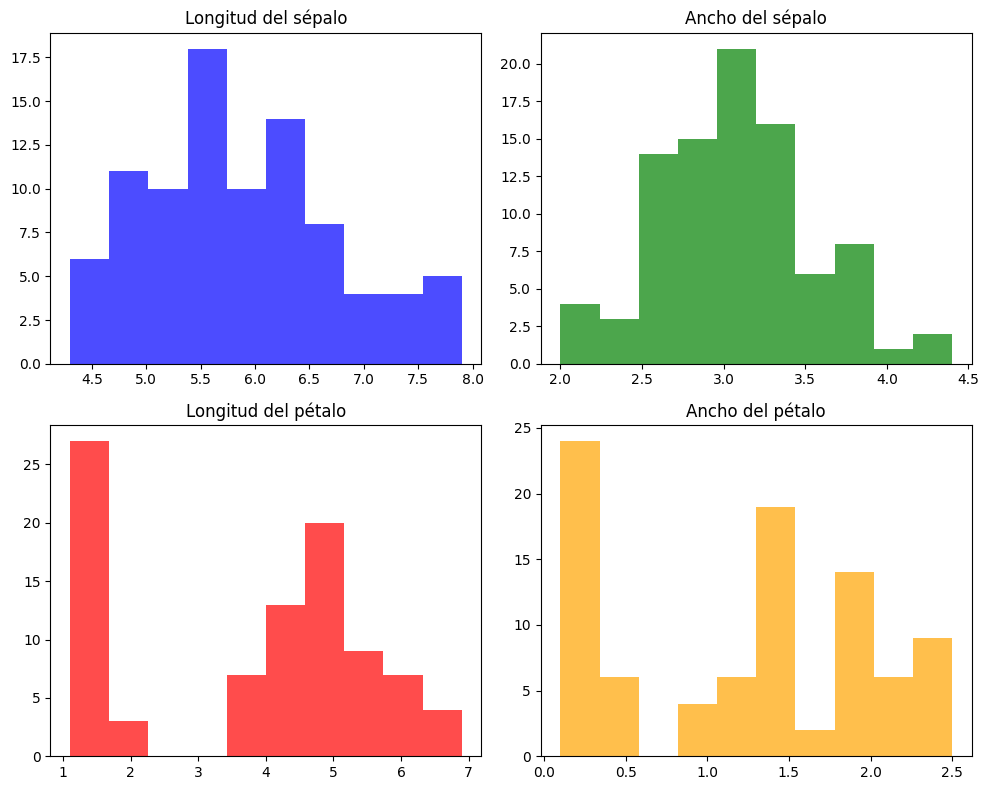

In [7]:
n_bins = 10
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0,0].hist(train['sepal_length'], bins=n_bins, color='blue', alpha=0.7)
axs[0,0].set_title('Longitud del sépalo')
axs[0,1].hist(train['sepal_width'], bins=n_bins, color='green', alpha=0.7)
axs[0,1].set_title('Ancho del sépalo')
axs[1,0].hist(train['petal_length'], bins=n_bins, color='red', alpha=0.7)
axs[1,0].set_title('Longitud del pétalo')
axs[1,1].hist(train['petal_width'], bins=n_bins, color='orange', alpha=0.7)
axs[1,1].set_title('Ancho del pétalo')  
fig.tight_layout()
plt.show()


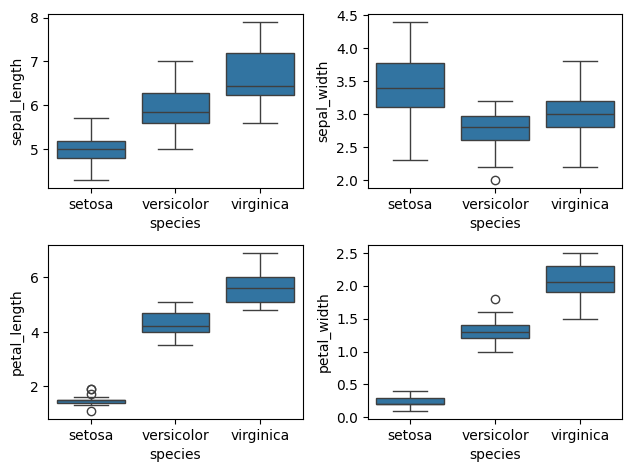

In [8]:
# dIAGRAMA BOXPLT
fig, axs = plt.subplots(2, 2)
fn = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
cn = ['setosa', 'versicolor', 'virginica']
sns.boxplot(x='species', y=fn[0], data=train, order=cn, ax=axs[0,0])
sns.boxplot(x='species', y=fn[1], data=train, order=cn, ax=axs[0,1])
sns.boxplot(x='species', y=fn[2], data=train, order=cn, ax=axs[1,0])
sns.boxplot(x='species', y=fn[3], data=train, order=cn, ax=axs[1,1])
fig.tight_layout(pad=1.0);


In [9]:
sns.set_palette('Set2')

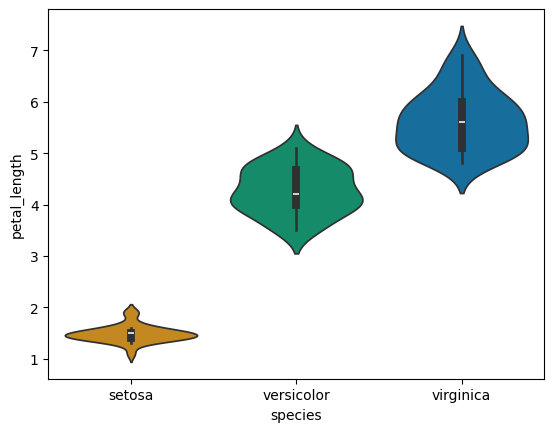

In [11]:
sns.violinplot(x='species', y='petal_length', data=train, hue='species', 
               order=cn, palette='colorblind');

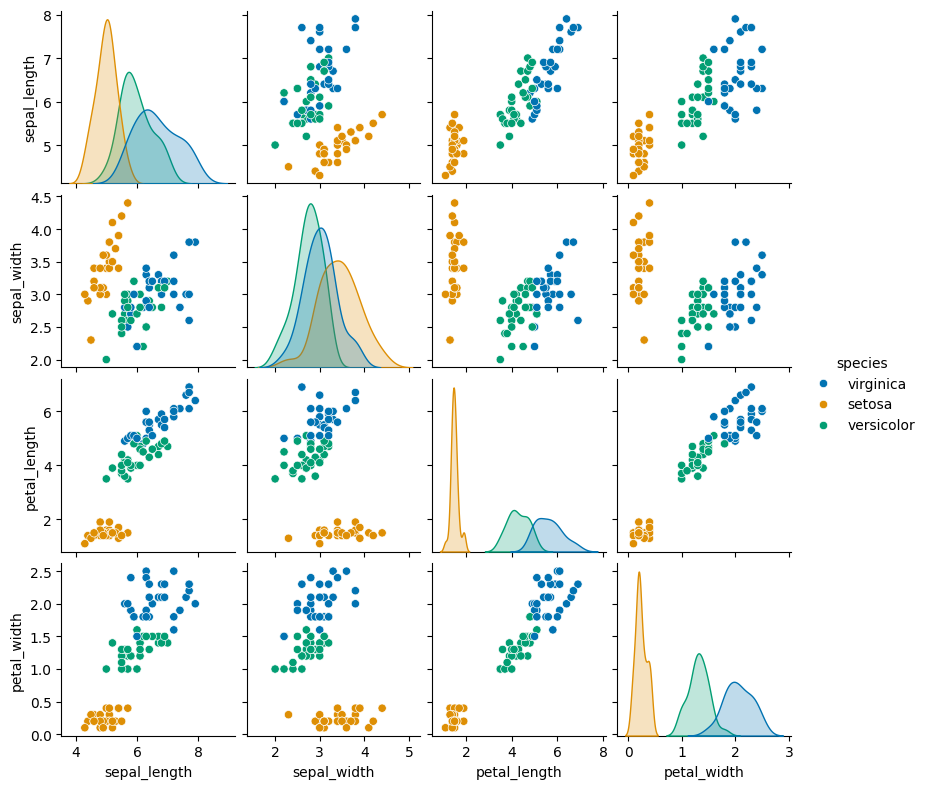

In [14]:
#Diagrama de dispersión de atributos emparejados
sns.pairplot(data=train, hue='species', height=2, palette='colorblind');

In [18]:
#Matriz de correlacion
corrmat = train.corr(numeric_only=True)
corrmat

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.066927,0.880222,0.820610
sepal_width,-0.066927,1.000000,-0.369708,-0.324162
petal_length,0.880222,-0.369708,1.000000,0.967165
petal_width,0.820610,-0.324162,0.967165,1.000000


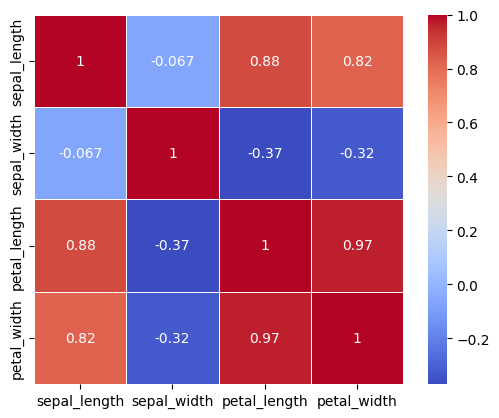

In [20]:
#Mapa de calor de la matriz de correlación
sns.heatmap(corrmat, annot=True, cmap='coolwarm', linewidths=0.5, square=True);


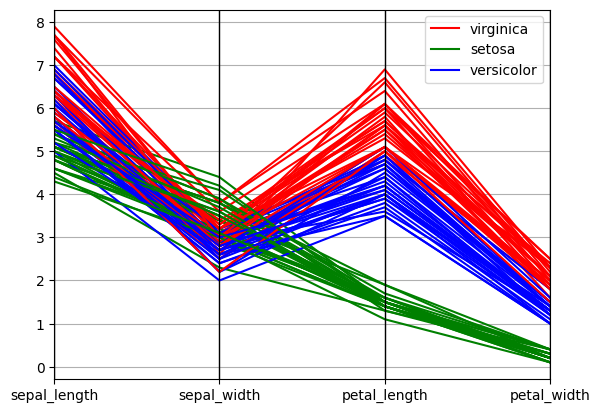

In [22]:
#Coordenadas paralelas
from pandas.plotting import parallel_coordinates
parallel_coordinates(train, 'species', color=['red', 'green', 'blue']);